In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import cv2

In [2]:
image_path = (r'C:\Skin_cancer_data')
for folder in os.listdir(image_path):
    list_of_elements = os.listdir(os.path.join(image_path, folder)) 
    print(f'Folder: {folder} = {len(list_of_elements)} images\n')

Folder: melan_orig = 93 images

Folder: not_malo_orig = 87 images



In [3]:
import splitfolders
splitfolders.ratio(
    r"C:\Skin_cancer_data",
    output="./content",
    seed=7,
    ratio=(0.8,0.2),
    group_prefix=None
)

Copying files: 180 files [00:00, 560.84 files/s]


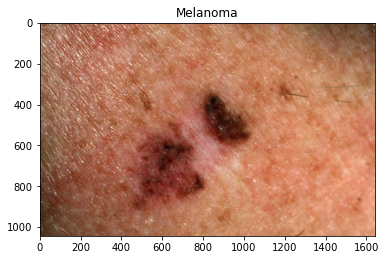

In [4]:
img1 = cv2.imread(r"C:\Skin_cancer_data\melan_orig\LMM7_orig.jpg")
plt.title('Melanoma')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)

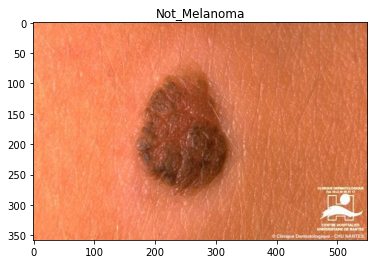

In [5]:
img2 = cv2.imread(r"C:\Skin_cancer_data\not_malo_orig\25_orig.jpg")
plt.title('Not_Melanoma')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range = 0.2,
    vertical_flip=True,
    horizontal_flip = True,
    fill_mode="reflect")

val_datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow_from_directory(
    './content/train',
    target_size=(224, 224),
    class_mode='categorical', 
    batch_size = 32
)

val_generator = train_datagen.flow_from_directory(
     './content/val',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size = 32
)

Found 143 images belonging to 2 classes.
Found 37 images belonging to 2 classes.


In [7]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load pre-trained VGG16 model
given_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers in the pretrained model
for layer in given_model.layers:
    layer.trainable = False

# Create a new model by adding custom layers on top of VGG16
top_model = Flatten()(given_model.output)
top_model = Dense(512, activation='relu')(top_model)
top_model = Dropout(0.3)(top_model)  # Adjust dropout rate
top_model = Dense(256, activation='relu')(top_model)
top_model = Dropout(0.2)(top_model)  # Adjust dropout rate
top_model = Dense(128, activation='relu')(top_model)
top_model = Dropout(0.1)(top_model)  # Adjust dropout rate
top_model = Dense(2, activation='softmax')(top_model)

# Create the final model by combining the VGG16 base and custom top
model = Model(inputs=given_model.input, outputs=top_model)

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=100, validation_data=val_generator)

Epoch 1/100
5/5 [==============================] - 46s 9s/step - loss: 1.4667 - accuracy: 0.5105 - val_loss: 2.3467 - val_accuracy: 0.4865
Epoch 2/100
5/5 [==============================] - 45s 9s/step - loss: 1.6214 - accuracy: 0.4476 - val_loss: 1.1513 - val_accuracy: 0.4865
Epoch 3/100
5/5 [==============================] - 48s 10s/step - loss: 1.0487 - accuracy: 0.4965 - val_loss: 1.0384 - val_accuracy: 0.5135
Epoch 4/100
5/5 [==============================] - 47s 10s/step - loss: 1.0615 - accuracy: 0.5594 - val_loss: 0.8839 - val_accuracy: 0.4865
Epoch 5/100
5/5 [==============================] - 48s 10s/step - loss: 1.0637 - accuracy: 0.5035 - val_loss: 0.6309 - val_accuracy: 0.5946
Epoch 6/100
5/5 [==============================] - 45s 10s/step - loss: 0.8230 - accuracy: 0.5524 - val_loss: 0.6571 - val_accuracy: 0.5946
Epoch 7/100
5/5 [==============================] - 46s 9s/step - loss: 0.8466 - accuracy: 0.5734 - val_loss: 0.7499 - val_accuracy: 0.5135
Epoch 8/100
5/5 [======

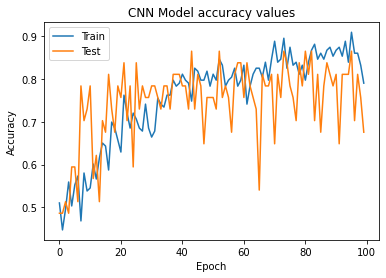

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

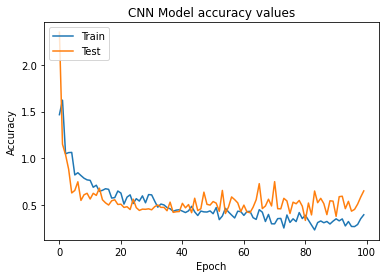

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()